### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
ingreso1 = tienda['Precio'].sum()
ingreso2 = tienda2['Precio'].sum()
ingreso3 = tienda3['Precio'].sum()
ingreso4 = tienda4['Precio'].sum()

print(f"Ingreso total tienda 1: {ingreso1}")
print(f"Ingreso total tienda 2: {ingreso2}")
print(f"Ingreso total tienda 3: {ingreso3}")
print(f"Ingreso total tienda 4: {ingreso4}")

Ingreso total tienda 1: 1150880400.0
Ingreso total tienda 2: 1116343500.0
Ingreso total tienda 3: 1098019600.0
Ingreso total tienda 4: 1038375700.0


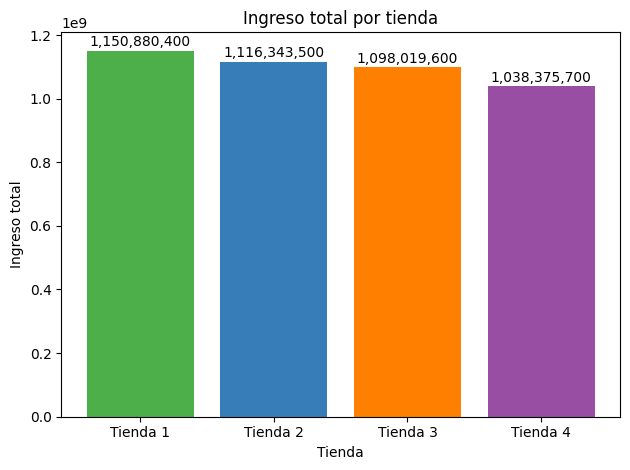

In [7]:
import matplotlib.pyplot as plt

# Prepara listas

ingresos = [ingreso1, ingreso2, ingreso3, ingreso4]

nombres  = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']

colores  = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3']

# Gráfico de barras
plt.figure()
bars = plt.bar(nombres, ingresos, color=colores)

# Añadir montos encima de cada barra
for bar, val in zip(bars, ingresos):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        val + max(ingresos)*0.005,
        f"{val:,.0f}",                        # monto con separador de miles
        ha='center',
        va='bottom'
    )

plt.title("Ingreso total por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingreso total")
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [9]:
import pandas as pd

tiendas = [tienda, tienda2, tienda3, tienda4]
nombres  = ['tienda_1','tienda_2','tienda_3','tienda_4']

# Para cada tienda, extraemos la columna de categorías como lista de cadenas:
listas_de_categorias = [ df['Categoría del Producto'].tolist() for df in tiendas ]


# Ahora contamos cuántas veces aparece cada categoría:
for nombre, categorias in zip(nombres, listas_de_categorias):
    # 3) Calculamos el conteo de cada categoría
    conteo = [(cat, categorias.count(cat)) for cat in set(categorias)]
    # 4) Ordenamos de mayor a menor
    conteo_ordenado = sorted(conteo, key=lambda x: x[1], reverse=True)
    # 5) Y ahora SÍ imprimimos SOLO el resumen
    print(f"\n {nombre} — Top categorías vendidas:")
    for cat, total in conteo_ordenado:
        print(f"   • {cat}: {total} unidades")


 tienda_1 — Top categorías vendidas:
   • Muebles: 465 unidades
   • Electrónicos: 448 unidades
   • Juguetes: 324 unidades
   • Electrodomésticos: 312 unidades
   • Deportes y diversión: 284 unidades
   • Instrumentos musicales: 182 unidades
   • Libros: 173 unidades
   • Artículos para el hogar: 171 unidades

 tienda_2 — Top categorías vendidas:
   • Muebles: 442 unidades
   • Electrónicos: 422 unidades
   • Juguetes: 313 unidades
   • Electrodomésticos: 305 unidades
   • Deportes y diversión: 275 unidades
   • Instrumentos musicales: 224 unidades
   • Libros: 197 unidades
   • Artículos para el hogar: 181 unidades

 tienda_3 — Top categorías vendidas:
   • Muebles: 499 unidades
   • Electrónicos: 451 unidades
   • Juguetes: 315 unidades
   • Electrodomésticos: 278 unidades
   • Deportes y diversión: 277 unidades
   • Libros: 185 unidades
   • Instrumentos musicales: 177 unidades
   • Artículos para el hogar: 177 unidades

 tienda_4 — Top categorías vendidas:
   • Muebles: 480 unida

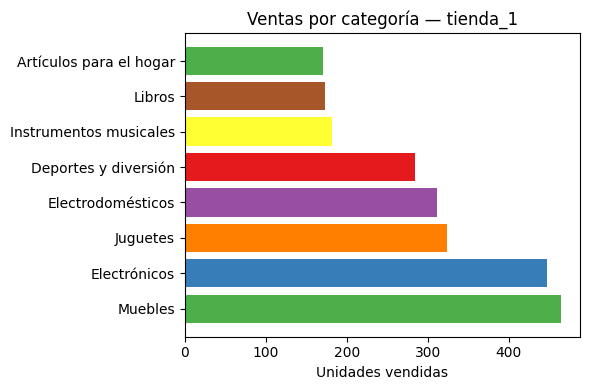

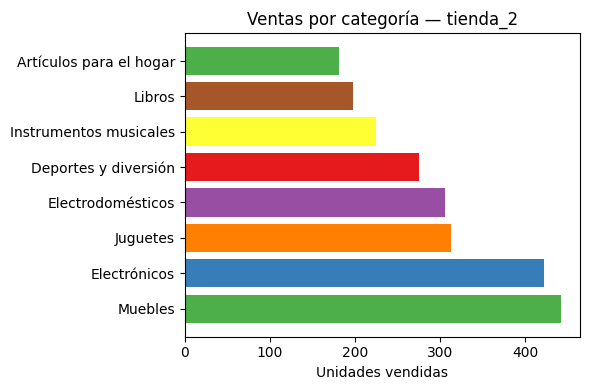

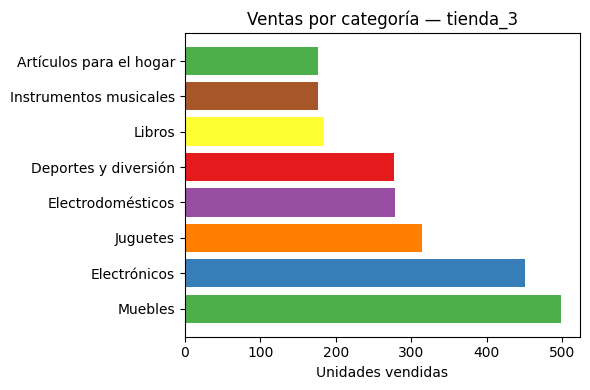

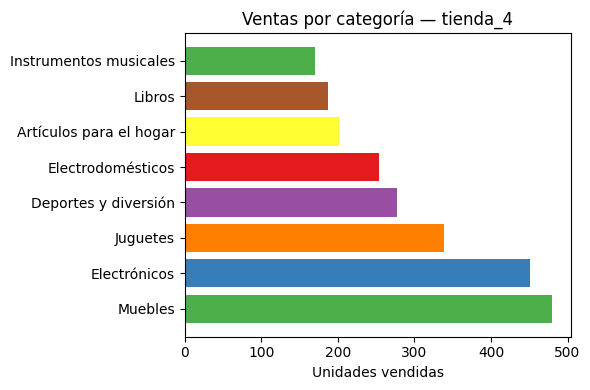

In [10]:
import matplotlib.pyplot as plt

colores_bar = ['#4daf4a','#377eb8','#ff7f00','#984ea3','#e41a1c','#ffff33','#a65628']

for nombre, categorias in zip(nombres, listas_de_categorias):
    # cálculo de conteo
    conteo = [(cat, categorias.count(cat)) for cat in set(categorias)]
    etiquetas, valores = zip(*sorted(conteo, key=lambda x: x[1], reverse=True))

    # gráfico de barras horizontales
    plt.figure(figsize=(6,4))
    plt.barh(etiquetas, valores, color=colores_bar[:len(etiquetas)])
    plt.title(f"Ventas por categoría — {nombre}")
    plt.xlabel("Unidades vendidas")
    plt.tight_layout()
    plt.show()


# 3. Calificación promedio de la tienda


In [11]:
#Extrae la columna de calificaciones como listas de Python
listas_de_calif = [ df['Calificación'].tolist() for df in tiendas ]

#Recorre en paralelo nombre y sus calificaciones, calculando el promedio
for nombre, califs in zip(nombres, listas_de_calif):
    # evita división por cero si no hubiese ventas:
    if len(califs) == 0:
        promedio = 0
    else:
        promedio = sum(califs) / len(califs)

    # Imprime el resultado
    print(f"Valoración media en {nombre}: {promedio:.2f}")

Valoración media en tienda_1: 3.98
Valoración media en tienda_2: 4.04
Valoración media en tienda_3: 4.05
Valoración media en tienda_4: 4.00


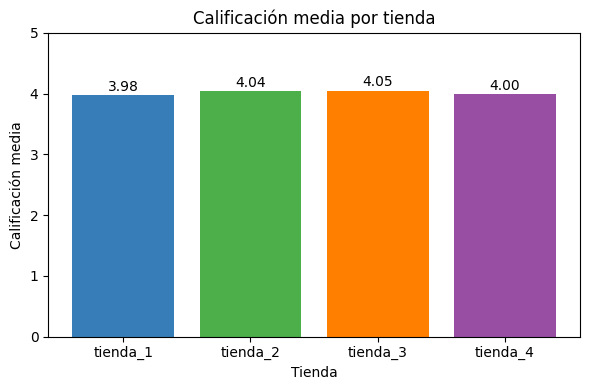

In [12]:
import matplotlib.pyplot as plt


# Calcula la lista de promedios
promedios = [sum(cal)/len(cal) if cal else 0 for cal in listas_de_calif]

# Dibuja un gráfico de barras
plt.figure(figsize=(6,4))
bars = plt.bar(nombres, promedios, color=['#377eb8','#4daf4a','#ff7f00','#984ea3'])

# Añade etiquetas con el valor encima de cada barra
for bar, val in zip(bars, promedios):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        val + 0.02,
        f"{val:.2f}",
        ha='center',
        va='bottom'
    )

plt.title("Calificación media por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación media")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [14]:
# Extrae para cada tienda la lista de productos vendidos
listas_de_productos = [ df['Producto'].tolist() for df in tiendas ]

#Recorre cada tienda y calcula:
for nombre, productos in zip(nombres, listas_de_productos):
    # a) construye tuplas (producto, cantidad)
    conteo = [(prod, productos.count(prod)) for prod in set(productos)]
    # b) obtén el máximo y mínimo de ventas
    max_ventas = max(conteo, key=lambda x: x[1])[1]
    min_ventas = min(conteo, key=lambda x: x[1])[1]
    # c) filtra los productos que empatan en máximo y mínimo
    mas_vendidos  = [prod for prod, cnt in conteo if cnt == max_ventas]
    menos_vendidos = [prod for prod, cnt in conteo if cnt == min_ventas]

    #Imprime los resultados
    print(f"\n— {nombre} —")
    print(f"Productos más vendidos ({max_ventas} unidades): {mas_vendidos}")
    print(f"Productos menos vendidos ({min_ventas} unidades): {menos_vendidos}")


— tienda_1 —
Productos más vendidos (60 unidades): ['TV LED UHD 4K', 'Microondas', 'Armario']
Productos menos vendidos (33 unidades): ['Auriculares con micrófono', 'Celular ABXY']

— tienda_2 —
Productos más vendidos (65 unidades): ['Iniciando en programación']
Productos menos vendidos (32 unidades): ['Juego de mesa']

— tienda_3 —
Productos más vendidos (57 unidades): ['Kit de bancas']
Productos menos vendidos (35 unidades): ['Bloques de construcción']

— tienda_4 —
Productos más vendidos (62 unidades): ['Cama box']
Productos menos vendidos (33 unidades): ['Guitarra eléctrica']


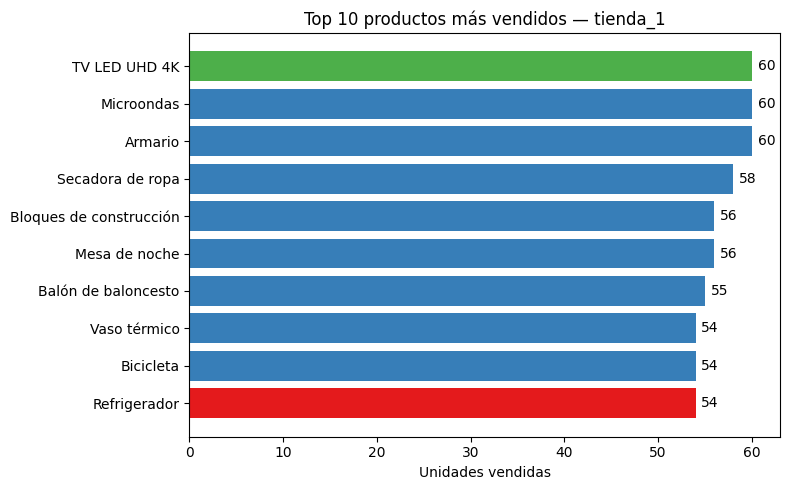

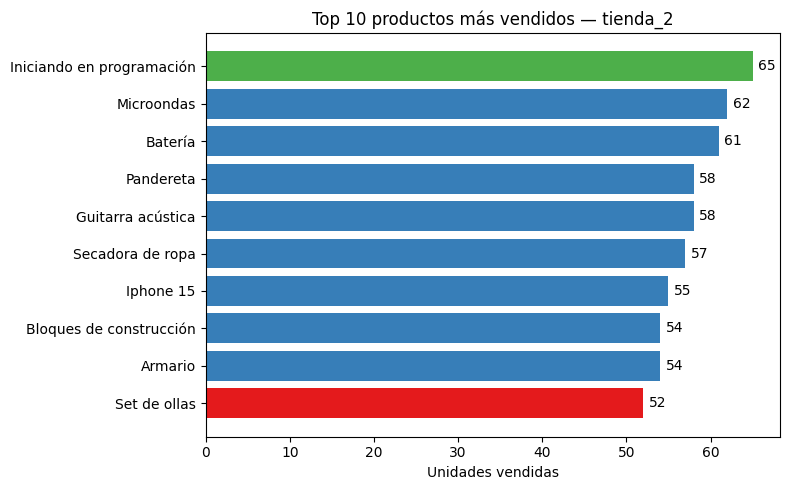

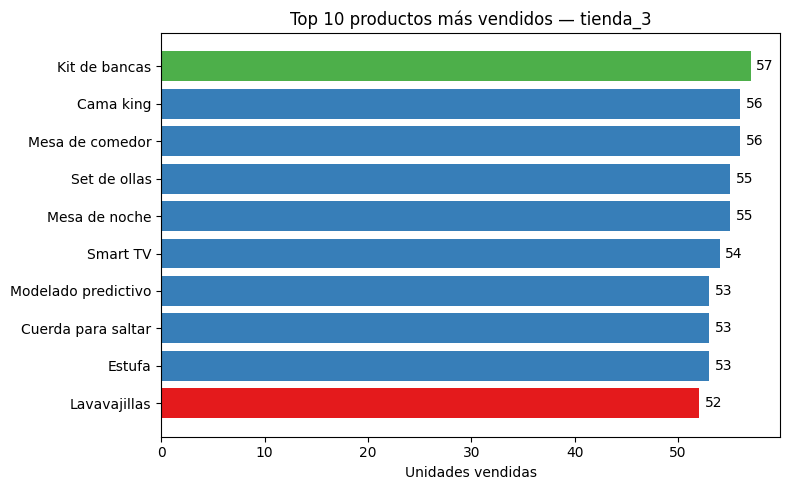

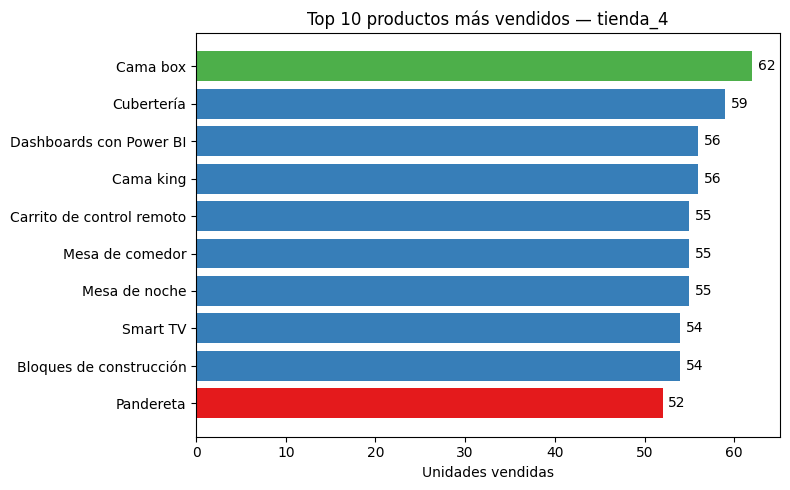

In [17]:
import matplotlib.pyplot as plt

TOP_N = 10

for nombre, productos in zip(nombres, listas_de_productos):
    # Conteo y orden descendente
    conteo = sorted(
        [(prod, productos.count(prod)) for prod in set(productos)],
        key=lambda x: x[1],
        reverse=True
    )[:TOP_N]
    etiquetas, valores = zip(*conteo)

    # Definir colores: verde al primero, rojo al último, azul al resto
    colores = [
        '#4daf4a' if i == 0 else
        '#e41a1c' if i == TOP_N-1 else
        '#377eb8'
        for i in range(TOP_N)
    ]

    # Dibujar gráfico horizontal
    plt.figure(figsize=(8, 5))
    bars = plt.barh(etiquetas, valores, color=colores)
    plt.gca().invert_yaxis()  # mayor arriba

    # Etiquetas de valor
    for bar, val in zip(bars, valores):
        plt.text(val + max(valores)*0.01, bar.get_y() + bar.get_height()/2,
                 f"{val}", va='center')

    plt.title(f"Top {TOP_N} productos más vendidos — {nombre}")
    plt.xlabel("Unidades vendidas")
    plt.tight_layout()
    plt.show()




```
# Esto tiene formato de código
```

# 5. Envío promedio por tienda

In [18]:
# Extrae para cada tienda la lista de costos de envío
listas_de_envio = [ df['Costo de envío'].tolist() for df in tiendas ]

# Recorre cada tienda y calcula el promedio
for nombre, costos in zip(nombres, listas_de_envio):
    if len(costos) == 0:
        promedio = 0
    else:
        promedio = sum(costos) / len(costos)
    print(f"Envío promedio en {nombre}: ${promedio:,.2f}")

Envío promedio en tienda_1: $26,018.61
Envío promedio en tienda_2: $25,216.24
Envío promedio en tienda_3: $24,805.68
Envío promedio en tienda_4: $23,459.46


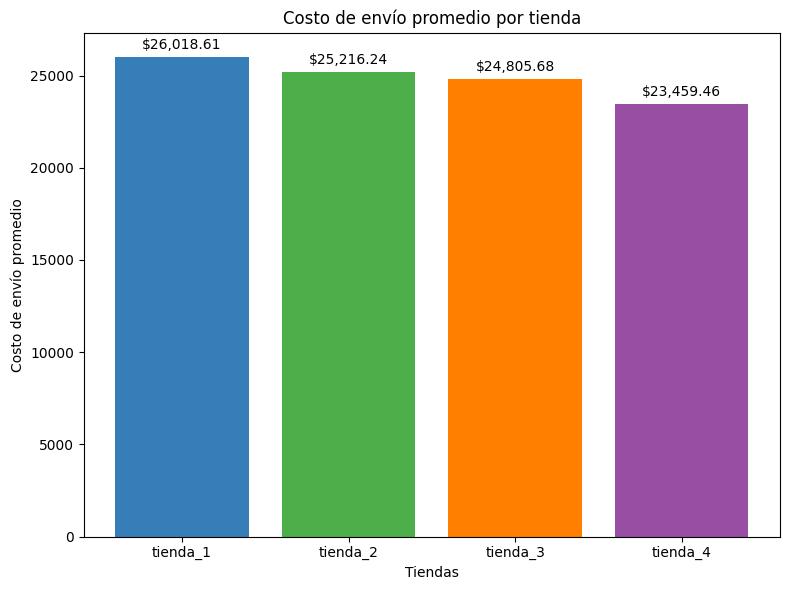

In [28]:
import matplotlib.pyplot as plt


# Calcula los promedios
promedios_envio = [
    (sum(costos)/len(costos)) if costos else 0
    for costos in listas_de_envio
]

# Dibuja un gráfico de barras con etiquetas de valor
plt.figure(figsize=(8,6))
bars = plt.bar(nombres, promedios_envio, color=['#377eb8','#4daf4a','#ff7f00','#984ea3'])

for bar, val in zip(bars, promedios_envio):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        val + max(promedios_envio)*0.01,
        f"${val:,.2f}",
        ha='center',
        va='bottom'
    )

plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Costo de envío promedio")
plt.tight_layout()
plt.show()




```
# Esto tiene formato de código
```

# 6. Análisis del desempeño geográfico




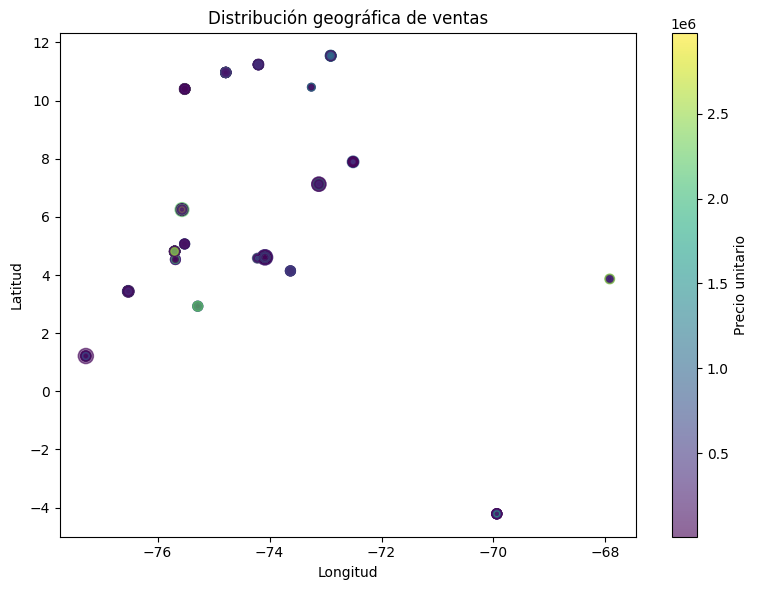

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatena en un solo DataFrame
df_all = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Scatter geográfico:
#    - Eje X: longitud
#    - Eje Y: latitud
#    - Color: precio unitario
#    - Tamaño: cantidad de cuotas (proxy de volumen)
plt.figure(figsize=(8,6))
sc = plt.scatter(
    df_all['lon'],
    df_all['lat'],
    c=df_all['Precio'],
    s=df_all['Cantidad de cuotas'] * 5,
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(sc, label='Precio unitario')
plt.title("Distribución geográfica de ventas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.tight_layout()
plt.show()


```
# Esto tiene formato de código
```

# 7. 📊 Informe Final de Análisis de Tiendas

1. Introducción

El objetivo de este análisis es determinar cuál de las cuatro tiendas evaluadas representa la mejor oportunidad de venta para el Sr. Juan. Para ello, se recopilaron y procesaron datos relevantes de ventas, calificaciones de clientes y logística de envío. A través de gráficos y métricas clave, buscamos entregar una visión clara y objetiva que facilite la toma de decisiones estratégicas fundamentadas en datos concretos.

.

📈 Desarrollo del Análisis

- Ingresos Totales por Tienda

Los ingresos totales se obtuvieron sumando la columna "Precio" en cada tienda. Los resultados indicaron que:

Tienda 1 generó el mayor ingreso total 1150880400.

Tienda 2 y Tienda 3 mostraron ingresos similares, un poco inferiores.

Tienda 4 tuvo el ingreso total más bajo.

👉 Lo anterior, muestra que Tienda 1 tiene el mayor volumen de ventas en términos monetarios, pero las diferencias no son muy grandes entre las primeras tres tiendas.

.

- Distribución de Categorías de Productos Vendidos

Las tiendas exhiben una clara dominancia en las categorías Muebles y Electrónicos, seguidas por Juguetes y Electrodomésticos.

Tienda 3 lidera en ventas de Muebles con 499 unidades, seguida de Tienda 4 (480) y Tienda 1 (465).

Tienda 4 destaca en Artículos para el hogar, mientras que Tienda 2 tiene un desempeño más equilibrado en categorías menos populares.

👉La diversificación en categorías permite evaluar la amplitud del portafolio de productos de cada tienda y su capacidad para atraer diferentes segmentos.

.


Calificación Promedio de los Clientes

La mejor calificación la obtiene Tienda 3 con 4.05 puntos.

Le siguen Tienda 2 con 4.04, Tienda 4 con 4.00 y finalmente Tienda 1 con 3.98.

👉 Las calificaciones indican la percepción del cliente sobre calidad y servicio, aspecto crucial para la fidelización y sostenibilidad.

.

- Productos Más y Menos Vendidos

Tienda 1: Productos más vendidos incluyen TV LED UHD 4K, Microondas y Armario (60 unidades). Los menos vendidos son Auriculares con micrófono y Celular ABXY (33 unidades).

Tienda 2: Iniciando en programación domina con 65 unidades vendidas. Producto menos vendido es Juego de mesa (32 unidades).

Tienda 3: Kit de bancas es el más vendido con 57 unidades, mientras que Bloques de construcción es el menos vendido (35 unidades).

Tienda 4: Lidera con Cama box (62 unidades), y Guitarra eléctrica es el menos vendido (33 unidades).

 👉 Esto evidencia un mix variado donde cada tienda tiene productos estrella y algunos con baja rotación, lo cual impacta la gestión de inventarios y las estrategias comerciales.

.

Costo de Envío Promedio

Los costos de envío promedio van desde 23.459 en Tienda 4 hasta 26.018 en Tienda 1.

Tienda 4 presenta el costo logístico más bajo, lo que puede favorecer sus márgenes de ganancia.

Tienda 3 y Tienda 2 tienen costos intermedios.

👉 Este aspecto es fundamental para evaluar la rentabilidad neta después de gastos de logística.

.

Conclusión y Recomendación

Tras analizar los ingresos, la satisfacción del cliente, la diversidad y rotación de productos y los costos logísticos, se recomienda que el Sr. Juan enfoque su venta en Tienda 3 por los siguientes motivos:

Es la tienda con la mejor calificación promedio de clientes, lo que implica alta satisfacción y potencial fidelización.

Aunque no es la que genera mayores ingresos totales (ocupa el tercer lugar), mantiene ingresos cercanos a las tiendas líderes, asegurando volumen.

Tiene un mix equilibrado de productos más y menos vendidos, facilitando una gestión de inventarios estable.

El costo de envío promedio es moderado, optimizando la rentabilidad.

Tienda 1, si bien lidera en ingresos, tiene la calificación promedio más baja y un costo de envío alto, lo que podría afectar su desempeño a largo plazo.

Tienda 4 tiene costos logísticos más bajos y buen mix de productos, pero sus ingresos totales son los más bajos.

Tienda 2 mantiene buen balance, aunque sus productos más vendidos están menos diversificados.









```
# Esto tiene formato de código
```

# 8. 📖 README 📖